# Vizualiztion of current data


### Steps
1. Import libraries.
2. Read data: There are 3 datasets, hence loading them seperately:

    * [NYPD dataset](https://catalog.data.gov/dataset/nypd-arrests-data-historic): Has 19 indicators and about 5.5 million observations. Includes all arrest records from 2006 to present reported in NYC by NYPD.
   
    * [Chicago dataset](https://www.kaggle.com/datasets/middlehigh/los-angeles-crime-data-from-2000?select=Chicage+Crime+Data.csv): a combination of four datasets which together cover all arrests in Chicago, IL, for the years 2004 to 2017. Has 22 indicators and more than 6 million observations.
    
    * [LA dataset](https://www.kaggle.com/datasets/middlehigh/los-angeles-crime-data-from-2000?select=Chicage+Crime+Data.csv): Has 28 indicators and about 830,000 observations. Includes all crime data in Los Angeles, CA, from 2019 to 2024.  
3. Clean data. 
    * In our research we learned that there is a relationship between recessions and crime such as **homicide**, **robbery**, and **burglary**.
    * For each dataset we would visualize the relevant crimes.
        * For the `LA dataset`, we would visualize the rise in domextic violence assualts during COVID-19 since the literature supports this hypothesis. 



In [1]:
import pandas as pd
import numpy as np

import warnings

import matplotlib.pyplot as plt

from IPython.core.display import HTML, display

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor


In [2]:
pd.options.mode.chained_assignment = None  # default='warn'

## Part1: Loading the datasets

In [3]:
NYPD = pd.read_csv('NYPD_Arrests_Data__Historic_.csv', sep=',')

print(NYPD.shape)
NYPD.head()

(5725522, 19)


,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,186134240,08/07/2018,184.0,NaN,NaN,NaN,PL 12070E1,F,K,73,0.0,45-64,M,BLACK,1007585.0,183788.0,40.671110,-73.915881,POINT (-73.91588130999997 40.67110980800004)
1,220476154,11/13/2020,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1600500,F,B,40,0.0,25-44,M,BLACK,1005041.0,234533.0,40.810398,-73.924895,POINT (-73.92489531099994 40.810398494000026)
2,199148493,07/01/2019,440.0,NaN,NaN,NaN,PL 1553502,F,M,23,1.0,25-44,M,BLACK HISPANIC,998829.0,226859.0,40.789348,-73.947352,POINT (-73.94735241299998 40.78934789300007)
3,209928408,02/22/2020,569.0,"MARIJUANA, SALE 4 & 5",235.0,DANGEROUS DRUGS,PL 2214000,M,M,32,0.0,25-44,M,BLACK,1001610.0,241367.0,40.829163,-73.937272,POINT (-73.93727189399993 40.829163304000076)
4,220330574,11/10/2020,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,49,0.0,25-44,M,WHITE,1024396.0,250744.0,40.854826,-73.854880,POINT (-73.85487970999998 40.85482622300003)


In [4]:
warnings.filterwarnings('ignore')


df1 = pd.read_csv('Chicago_Crimes_2005_to_2007.csv', error_bad_lines=False, warn_bad_lines=True)
df2 = pd.read_csv('Chicago_Crimes_2008_to_2011.csv', error_bad_lines=False, warn_bad_lines=True)
df3 = pd.read_csv('Chicago_Crimes_2012_to_2017.csv', error_bad_lines=False, warn_bad_lines=True)

warnings.filterwarnings('default')

chicago = pd.concat([df1, df2, df3], ignore_index=True)

chicago.to_csv('chicago.csv', index=False)

print(chicago.shape)
chicago.head()

b'Skipping line 533719: expected 23 fields, saw 24\n'
b'Skipping line 1149094: expected 23 fields, saw 41\n'


(6017767, 23)


,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,4673626,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,45.0,11.0,26,1136872.0,1936499.0,2006,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
1,1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,...,20.0,42.0,18,1181027.0,1861693.0,2006,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2,2,4673628,HM113861,01/08/2006 11:16:00 PM,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,...,5.0,69.0,04A,1186023.0,1859609.0,2006,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"
3,4,4673629,HM274049,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,...,38.0,17.0,08B,1134772.0,1922299.0,2006,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)"
4,5,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,...,13.0,65.0,18,1152412.0,1864560.0,2006,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)"


In [5]:
LA = pd.read_csv('Crime_Data_from_2020_to_Present.csv', sep=',')

print(LA.shape)
LA.head()

/usr/local/lib/python3.8/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(829778, 28)


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


Changing all spaces in the columns' names to underscores in the `chicago` and the `LA` datasets

In [6]:

# chicago
chicago.columns = chicago.columns.str.replace(' ', '_')

# LA
LA.columns = LA.columns.str.replace(' ', '_')

/usr/local/lib/python3.8/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Part 2: Filtering the data

Filtering the data for each dataset based on the crime types we investigate. Note that for the `LA` dataset, we would filter to two seperate datasets:
1. Containing only **robbery**, **burglary**, and **homocide** offenses (`filtered_la`).
2. Containing all offenses that are classified as **domestic** (`domestic_la`) 

In [7]:
nypd_filtered = NYPD[NYPD['PD_DESC'].str.contains(r'(?i)robbery|burglary|homicide', na=False)]
print(nypd_filtered.shape)
nypd_filtered.head()

(280207, 19)


,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
1,220476154,11/13/2020,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1600500,F,B,40,0.0,25-44,M,BLACK,1005041.0,234533.0,40.810398,-73.924895,POINT (-73.92489531099994 40.810398494000026)
5,220509245,11/14/2020,223.0,"BURGLARY,RESIDENCE,NIGHT",107.0,BURGLARY,PL 1402502,F,M,19,0.0,45-64,M,WHITE HISPANIC,994297.0,218680.0,40.766905,-73.963731,POINT (-73.96373101899997 40.76690500600006)
15,219850107,10/28/2020,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601504,F,Q,103,0.0,18-24,M,BLACK,1041879.0,197084.0,40.707447,-73.792142,POINT (-73.79214176799998 40.707447364000075)
17,217909568,09/16/2020,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1600500,F,Q,107,0.0,45-64,M,WHITE,1036790.0,205267.0,40.729939,-73.810433,POINT (-73.81043314199997 40.729939364000074)
18,218229753,09/23/2020,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1600500,F,K,81,0.0,18-24,M,BLACK,1000937.0,191378.0,40.691958,-73.939828,POINT (-73.93982782299997 40.691957657000046)


In [8]:
#chicago_UNIQUE = chicago['Description'].unique().tolist()

#print(chicago_UNIQUE)


/usr/local/lib/python3.8/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


After inspection, there is no "robbery" category of crime in Chicago dataset (see previos cell). Hence, I will consider the "robbery crime as "theft" or "stolen" per the Description column.

Furthermore, in later analysis it became clear that there are very few instances of direct "Homicide" description (as it seems, Chicago has diffrent crime descritions then in New York and California). Hence, I will not analyze homicide crimes for this data set.

In [9]:
chicago_filtered = chicago[chicago['Description'].str.contains(r'(?i)theft|stolen|burglary|homicide', na=False)]
print(chicago_filtered.shape)
chicago_filtered.head()

(338329, 23)


,Unnamed:_0,ID,Case_Number,Date,Block,IUCR,Primary_Type,Description,Location_Description,Arrest,...,Ward,Community_Area,FBI_Code,X_Coordinate,Y_Coordinate,Year,Updated_On,Latitude,Longitude,Location
12,13,4673640,HM275082,04/06/2006 11:30:00 AM,017XX E 86TH PL,0935,MOTOR VEHICLE THEFT,"THEFT/RECOVERY: TRUCK,BUS,MHOME",STREET,False,...,8.0,45.0,07,1189375.0,1847970.0,2006,04/15/2016 08:55:02 AM,41.737879,-87.581757,"(41.737879171, -87.581756795)"
16,17,4673645,HM272962,04/05/2006 08:00:00 AM,024XX W HARRISON ST,0935,MOTOR VEHICLE THEFT,"THEFT/RECOVERY: TRUCK,BUS,MHOME",STREET,False,...,2.0,28.0,07,1160214.0,1897293.0,2006,04/15/2016 08:55:02 AM,41.873877,-87.687237,"(41.873876903, -87.687236966)"
27,28,4673657,HM263290,03/31/2006 10:00:00 AM,018XX W 69TH ST,502P,OTHER OFFENSE,FALSE/STOLEN/ALTERED TRP,STREET,True,...,17.0,67.0,26,1165457.0,1858929.0,2006,04/15/2016 08:55:02 AM,41.768492,-87.669076,"(41.768491995, -87.669076134)"
99,101,4673767,HM274500,04/06/2006 12:51:00 AM,070XX S STONY ISLAND AVE,0860,THEFT,RETAIL THEFT,GAS STATION,True,...,5.0,43.0,06,1188135.0,1858735.0,2006,04/15/2016 08:55:02 AM,41.767449,-87.585957,"(41.767448959, -87.585957168)"
103,105,4673771,HM274758,03/03/2006 09:00:00 AM,097XX S MERRION AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,...,7.0,51.0,06,1192688.0,1840647.0,2006,04/15/2016 08:55:02 AM,41.717704,-87.569857,"(41.71770413, -87.569856983)"


In [10]:
filtered_la = LA[LA['Crm_Cd_Desc'].str.contains(r'(?i)robbery|burglary|homicide', na=False)]
print(filtered_la.shape)
filtered_la.head()

/usr/local/lib/python3.8/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(139757, 28)


,DR_NO,Date_Rptd,DATE_OCC,TIME_OCC,AREA,AREA_NAME,Rpt_Dist_No,Part_1-2,Crm_Cd,Crm_Cd_Desc,...,Status,Status_Desc,Crm_Cd_1,Crm_Cd_2,Crm_Cd_3,Crm_Cd_4,LOCATION,Cross_Street,LAT,LON
10,200100509,01/04/2020 12:00:00 AM,01/04/2020 12:00:00 AM,2200,1,Central,192,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,NaN,NaN,NaN,15TH,OLIVE,34.0359,-118.2648
19,200100535,01/14/2020 12:00:00 AM,01/14/2020 12:00:00 AM,1330,1,Central,152,1,210,ROBBERY,...,IC,Invest Cont,210.0,NaN,NaN,NaN,7TH,HILL,34.0463,-118.2550
26,201106067,02/15/2020 12:00:00 AM,02/15/2020 12:00:00 AM,1830,11,Northeast,1101,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,NaN,NaN,NaN,2700 N VERMONT AV,NaN,34.1179,-118.2930
30,200100559,01/23/2020 12:00:00 AM,01/23/2020 12:00:00 AM,600,1,Central,111,1,310,BURGLARY,...,AO,Adult Other,310.0,NaN,NaN,NaN,700 N MAIN ST,NaN,34.0583,-118.2378
41,200100576,01/30/2020 12:00:00 AM,01/30/2020 12:00:00 AM,55,1,Central,195,1,330,BURGLARY FROM VEHICLE,...,AA,Adult Arrest,330.0,NaN,NaN,NaN,18TH ST,LOS ANGELES ST,34.0317,-118.2626


For the next two cells, I created a list to know all unique crime types and all unique premises, to identify observations that seem as domestic violence incidents in the `LA` dataset. Note that we cannot be certain if all of these incidents are in fact domestic assaults. However, we would treat them as such since we want to investigate if there waas a rise in domestic violence incidents during COVID-19. 
I first ran these cells to know the possibilities, but for the sake of faster runtime, these cells are now comment cells.

In [11]:
#LA_UNIQUE_Crimes = LA['Crm_Cd_Desc'].unique().tolist()

#print(LA_UNIQUE_Crimes)


/usr/local/lib/python3.8/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
#LA_UNIQUE_premises = LA['Premis_Desc'].unique().tolist()

#print(LA_UNIQUE_premises)


In [13]:
domestic_la = LA[
    ((LA['Crm_Cd_Desc'].str.contains('INTIMATE PARTNER', case=False)) | 
     (LA['Crm_Cd_Desc'].str.contains('CHILD ABUSE', case=False)) |
    (LA['Crm_Cd_Desc'].str.contains('CRM AGNST CHLD', case=False)) ) & 
    ### note that the next identifies duplexes and apartments
    ((LA['Premis_Desc'].str.contains('SINGLE FAMILY DWELLING', case=False)) |  
     (LA['Premis_Desc'].str.contains('MULTI-UNIT DWELLING', case=False))  |
     (LA['Premis_Desc'].str.contains('OTHER RESIDENCE', case=False)) |
     (LA['Premis_Desc'].str.contains('PORCH, RESIDENTIAL', case=False)) 
    )
]


domestic_la = LA[LA['Crm_Cd_Desc'].str.contains(r'(?i)INTIMATE PARTNER|CHILD ABUSE|CHLD', na=False)]
print(domestic_la.shape)
domestic_la.head()

(58278, 28)


,DR_NO,Date_Rptd,DATE_OCC,TIME_OCC,AREA,AREA_NAME,Rpt_Dist_No,Part_1-2,Crm_Cd,Crm_Cd_Desc,...,Status,Status_Desc,Crm_Cd_1,Crm_Cd_2,Crm_Cd_3,Crm_Cd_4,LOCATION,Cross_Street,LAT,LON
15,211916029,11/26/2021 12:00:00 AM,11/30/2020 12:00:00 AM,730,19,Mission,1916,2,626,INTIMATE PARTNER - SIMPLE ASSAULT,...,IC,Invest Cont,626.0,NaN,NaN,NaN,14200 BERG ST,NaN,34.3055,-118.4439
16,201116159,11/29/2020 12:00:00 AM,11/28/2020 12:00:00 AM,2018,11,Northeast,1124,2,626,INTIMATE PARTNER - SIMPLE ASSAULT,...,AO,Adult Other,626.0,NaN,NaN,NaN,3200 W AVENUE 32,NaN,34.1186,-118.2450
32,201111990,07/29/2020 12:00:00 AM,07/29/2020 12:00:00 AM,2020,11,Northeast,1124,2,626,INTIMATE PARTNER - SIMPLE ASSAULT,...,AO,Adult Other,626.0,NaN,NaN,NaN,3200 W AVENUE 32,NaN,34.1186,-118.2450
48,201225288,11/26/2020 12:00:00 AM,11/26/2020 12:00:00 AM,115,12,77th Street,1257,1,236,INTIMATE PARTNER - AGGRAVATED ASSAULT,...,AA,Adult Arrest,236.0,NaN,NaN,NaN,500 W 77TH ST,NaN,33.9698,-118.2833
51,200407198,03/22/2020 12:00:00 AM,03/22/2020 12:00:00 AM,430,4,Hollenbeck,466,2,626,INTIMATE PARTNER - SIMPLE ASSAULT,...,AO,Adult Other,626.0,NaN,NaN,NaN,300 N EVERGREEN AV,NaN,34.0436,-118.2051


Converting the date columns to `datetime` type.

In [14]:
nypd_filtered.loc[:, 'ARREST_DATE'] = pd.to_datetime(nypd_filtered['ARREST_DATE'])

# print(nypd_filtered.sort_values(by='ARREST_DATE',  ascending=True))

/usr/local/lib/python3.8/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
warnings.filterwarnings("ignore", category=DeprecationWarning, module="ipykernel.ipkernel")

chicago_filtered.loc[:, 'Date'] = pd.to_datetime(chicago_filtered['Date'])


#print(chicago_filtered.sort_values(by='Date',  ascending=True))

In [16]:
filtered_la.loc[:, 'DATE_OCC'] = pd.to_datetime(filtered_la['DATE_OCC'])

#print(filtered_la.sort_values(by='DATE_OCC',  ascending=True))

In [17]:
domestic_la.loc[:, 'DATE_OCC'] = pd.to_datetime(domestic_la['DATE_OCC'])

#print(domestic_la.sort_values(by='DATE_OCC',  ascending=True))

Checking for each has null values.

In [18]:
# check if there are null values

null_nypd = nypd_filtered.isnull().sum().loc[lambda x: x > 0]
print(null_nypd)

AGE_GROUP    1
dtype: int64


In [19]:
# check if there are null values

null_chicago = chicago_filtered.isnull().sum().loc[lambda x: x > 0]
print(null_chicago)

Location_Description     1200
District                    4
Community_Area            116
X_Coordinate            14166
Y_Coordinate            14166
Latitude                14166
Longitude               14166
Location                14166
dtype: int64


In [20]:
# check if there are null values

null_la = filtered_la.isnull().sum().loc[lambda x: x > 0]
print(null_la)

Mocodes              366
Vict_Sex             151
Vict_Descent         150
Premis_Desc          363
Weapon_Used_Cd     95685
Weapon_Desc        95685
Crm_Cd_1               1
Crm_Cd_2          125234
Crm_Cd_3          139497
Crm_Cd_4          139746
Cross_Street      115511
dtype: int64


In [21]:
# check if there are null values

null_domestic = domestic_la.isnull().sum().loc[lambda x: x > 0]
print(null_domestic)

Mocodes              86
Vict_Sex             17
Vict_Descent         17
Premis_Cd             1
Premis_Desc           3
Weapon_Used_Cd      104
Weapon_Desc         104
Crm_Cd_2          53683
Crm_Cd_3          58103
Crm_Cd_4          58273
Cross_Street      50774
dtype: int64


For all the datasets, the null values are not necessary for this analysis. Hence, we will continue without dropping those observations.

## Part 3: Preparing the data for initial visualization

### _NYPD_

In [22]:
nypd_filtered['Robbery'] = nypd_filtered['OFNS_DESC'].str.contains(r'\brobbery\b', case = False, na= False).astype(int)
nypd_filtered['Homicide'] = nypd_filtered['OFNS_DESC'].str.contains(r'\bhomicide\b', case = False, na= False).astype(int)
nypd_filtered['Burglary'] = nypd_filtered['OFNS_DESC'].str.contains(r'\bBurglary\b', case = False, na= False).astype(int)

#nypd_filtered.head()

In [23]:
nypd_grouped = nypd_filtered.groupby(pd.Grouper(key='ARREST_DATE', freq = 'Q')).agg({'Robbery':'sum','Burglary':'sum','Homicide':'sum'}).reset_index()
#nypd_grouped.head()

In [24]:
nypd_grouped['quarter'] = 'Quarter' + nypd_grouped['ARREST_DATE'].dt.quarter.astype(str) + ', ' + nypd_grouped['ARREST_DATE'].dt.year.astype(str)

#nypd_grouped.head()

### _Chicago_

After inspection, there is no "robbery" category of crime in Chicago dataset (see previos cell). Hence, I will consider the "robbery crime as "theft" or "stolen" per the `Description` column. 

In [25]:
chicago_filtered['Robbery'] = chicago_filtered['Description'].str.contains(r'\b(?: theft|stolen)\b', case = False, na= False).astype(int)
chicago_filtered['Homicide'] = chicago_filtered['Description'].str.contains(r'\bhomicide\b', case = False, na= False).astype(int)
chicago_filtered['Burglary'] = chicago_filtered['Description'].str.contains(r'\bBurglary\b', case = False, na= False).astype(int)

#chicago_filtered.head()

In [26]:
chicago_grouped = chicago_filtered.groupby(pd.Grouper(key='Date', freq = 'Q')).agg({'Robbery':'sum','Burglary':'sum','Homicide':'sum'}).reset_index()

#chicago_grouped.head()

In [27]:
chicago_grouped['quarter'] = 'Quarter' + chicago_grouped['Date'].dt.quarter.astype(str) + ', ' + chicago_grouped['Date'].dt.year.astype(str)

#chicago_grouped.head()

### _LA - ROBBERY/BURGLARY/HOMICIDE_

In [28]:
filtered_la['Robbery'] = filtered_la['Crm_Cd_Desc'].str.contains(r'\brobbery\b', case = False, na= False).astype(int)
filtered_la['Homicide'] = filtered_la['Crm_Cd_Desc'].str.contains(r'\bhomicide\b', case = False, na= False).astype(int)
filtered_la['Burglary'] = filtered_la['Crm_Cd_Desc'].str.contains(r'\bBurglary\b', case = False, na= False).astype(int)

#filtered_la.head()

In [29]:
la_grouped = filtered_la.groupby(pd.Grouper(key='DATE_OCC', freq = 'Q')).agg({'Robbery':'sum','Burglary':'sum','Homicide':'sum'}).reset_index()
#la_grouped.head()

In [30]:
la_grouped['quarter'] = 'Quarter' + la_grouped['DATE_OCC'].dt.quarter.astype(str) + ', ' + la_grouped['DATE_OCC'].dt.year.astype(str)

#la_grouped.head()

### _LA Domestic Crimes_

In [31]:
domestic_la['Crimes involving children'] = domestic_la['Crm_Cd_Desc'].str.contains(r'\b(?: child|chld)\b', case = False, na= False).astype(int)
domestic_la['Crimes against partners'] = domestic_la['Crm_Cd_Desc'].str.contains(r'\bPARTNER\b', case = False, na= False).astype(int)

#domestic_la.head()

In [32]:
domestic_grouped = domestic_la.groupby(pd.Grouper(key='DATE_OCC', freq = 'Q')).agg({'Crimes involving children':'sum','Crimes against partners':'sum'}).reset_index()
#domestic_grouped.head()

In [33]:
domestic_grouped['quarter'] = 'Quarter' + domestic_grouped['DATE_OCC'].dt.quarter.astype(str) + ', ' + domestic_grouped['DATE_OCC'].dt.year.astype(str)

#domestic_grouped.head()

## Part 4: Creating graphs

For each dataset, I will create two graphs: one for burglary and robbery, and one for homicide. For the LA dataset, I will create another graph showing the proposed domestic violence arrests during COVID-19.
In each graph I will highlight the years 2008 to 2009 and 2020 to 2023 (besides for the Chicago dataset that does not cover the pandemic period), and create a relative linear regression to see the general trend in increase or decrease of arrests.
I will also create a function to ease the creation of graphs.

### _NYPD_

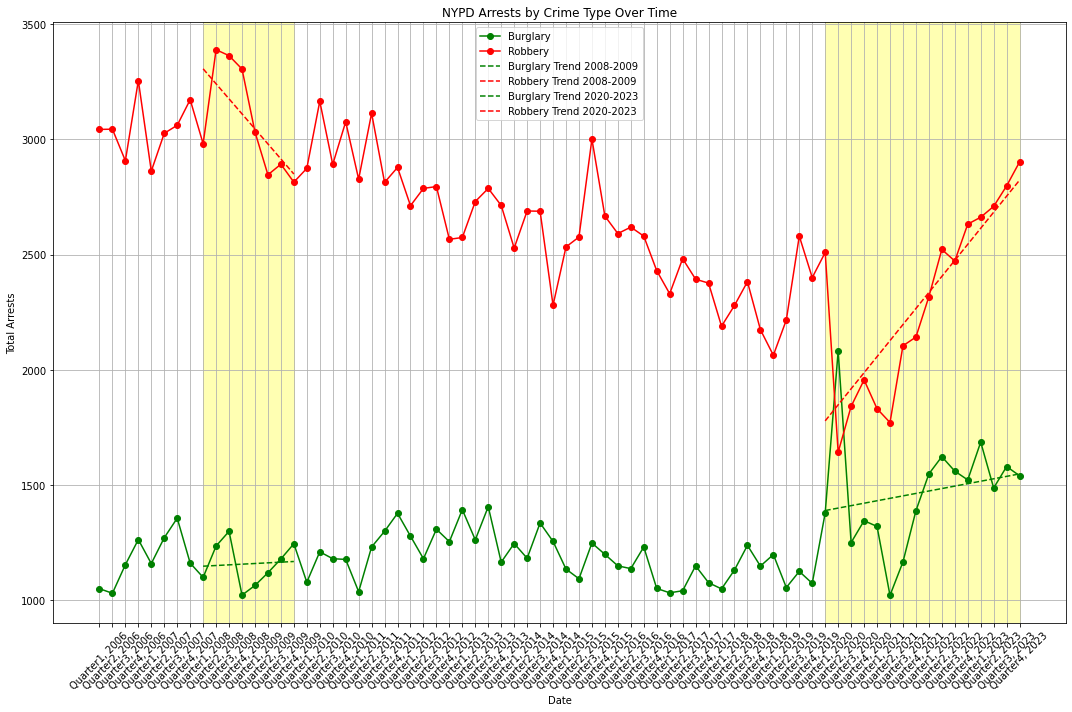

In [34]:
plt.figure(figsize=(15,10))

plt.plot(nypd_grouped['quarter'], nypd_grouped['Burglary'], label='Burglary', color = 'green', marker='o')
plt.plot(nypd_grouped['quarter'], nypd_grouped['Robbery'], label='Robbery', color = 'red', marker='o')

# highlighting inflation periods
twenty08 = nypd_grouped[nypd_grouped['quarter'] == 'Quarter1, 2008'].index[0]
twenty09 = nypd_grouped[nypd_grouped['quarter'] == 'Quarter4, 2009'].index[0]

twenty20 = nypd_grouped[nypd_grouped['quarter'] == 'Quarter1, 2020'].index[0]
twenty23 = nypd_grouped[nypd_grouped['quarter'] == 'Quarter4, 2023'].index[0]

#plotting highlights
plt.axvspan(twenty08, twenty09, color="yellow", alpha=0.3)
plt.axvspan(twenty20, twenty23, color="yellow", alpha=0.3)


subset_08_09 = nypd_grouped.iloc[twenty08:twenty09+1] #slicing
subset_20_23 = nypd_grouped.iloc[twenty20:twenty23+1] #slicing

x_08_09 = np.arange(len(subset_08_09))
x_20_23 = np.arange(len(subset_20_23))

y_burg_08_09 = subset_08_09['Burglary']
y_rob_08_09 = subset_08_09['Robbery']

y_burg_20_23 = subset_20_23['Burglary']
y_rob_20_23 = subset_20_23['Robbery']

# linear regression for each subset
slope_burg_08, intercept_burg_08, _, _, _ = stats.linregress(x_08_09, y_burg_08_09)
slope_rob_08, intercept_rob_08, _, _, _ = stats.linregress(x_08_09, y_rob_08_09)

slope_burg_20, intercept_burg_20, _, _, _ = stats.linregress(x_20_23, y_burg_20_23)
slope_rob_20, intercept_rob_20, _, _, _ = stats.linregress(x_20_23, y_rob_20_23)

# creating trend lines
trend_burg_08 = slope_burg_08 * x_08_09 + intercept_burg_08
trend_rob_08 = slope_rob_08 * x_08_09 + intercept_rob_08

trend_burg_20 = slope_burg_20 * x_20_23 + intercept_burg_20
trend_rob_20 = slope_rob_20 * x_20_23 + intercept_rob_20

#plotting trends
plt.plot(subset_08_09['quarter'], trend_burg_08, label='Burglary Trend 2008-2009',
            color='green', linestyle = "--")
plt.plot(subset_08_09['quarter'], trend_rob_08, label='Robbery Trend 2008-2009',
            color='red', linestyle = "--")

plt.plot(subset_20_23['quarter'], trend_burg_20, label='Burglary Trend 2020-2023',
            color='green', linestyle = "--")
plt.plot(subset_20_23['quarter'], trend_rob_20, label='Robbery Trend 2020-2023',
            color='red', linestyle = "--")


# formatting
plt.title('NYPD Arrests by Crime Type Over Time')
plt.xlabel('Date')
plt.ylabel('Total Arrests')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()

plt.show()

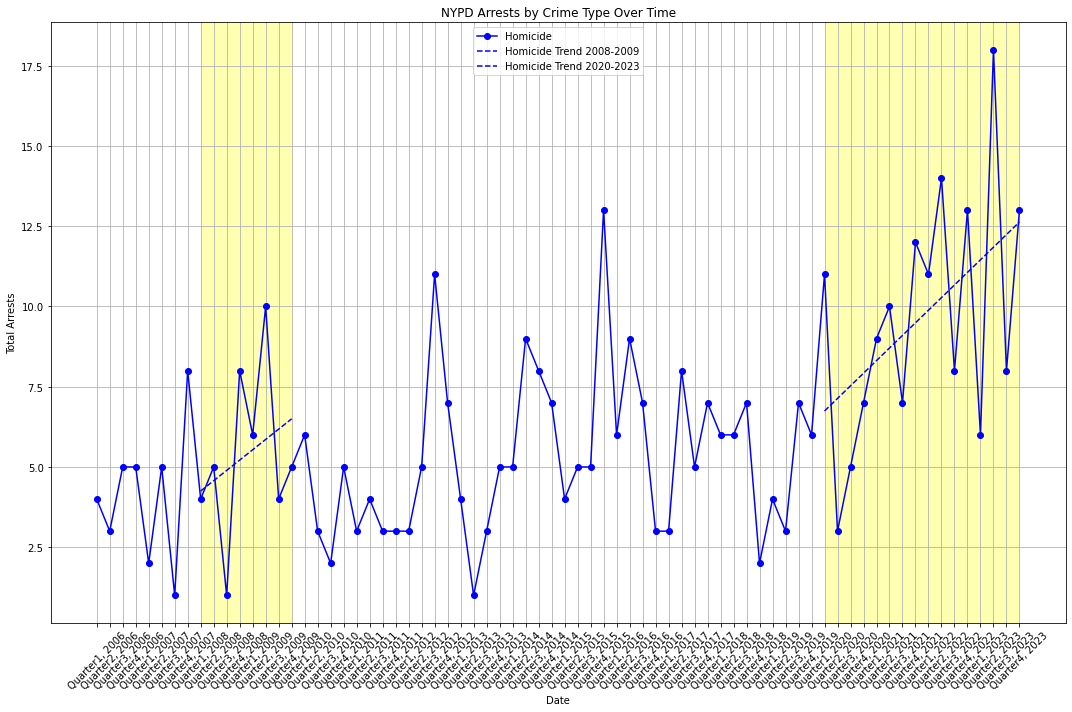

In [35]:
plt.figure(figsize=(15,10))
plt.plot(nypd_grouped['quarter'], nypd_grouped['Homicide'], label='Homicide', color = 'blue', marker='o')

twenty08 = nypd_grouped[nypd_grouped['quarter'] == 'Quarter1, 2008'].index[0]
twenty09 = nypd_grouped[nypd_grouped['quarter'] == 'Quarter4, 2009'].index[0]
twenty20 = nypd_grouped[nypd_grouped['quarter'] == 'Quarter1, 2020'].index[0]
twenty23 = nypd_grouped[nypd_grouped['quarter'] == 'Quarter4, 2023'].index[0]
plt.axvspan(twenty08, twenty09, color="yellow", alpha=0.3)
plt.axvspan(twenty20, twenty23, color="yellow", alpha=0.3)



#### again here will be a function
y_hom_08_09 = subset_08_09['Homicide']
y_hom_20_23 = subset_20_23['Homicide']

slope_hom_08, intercept_hom_08, _, _, _ = stats.linregress(x_08_09, y_hom_08_09)
slope_hom_20, intercept_hom_20, _, _, _ = stats.linregress(x_20_23, y_hom_20_23)

trend_hom_08 = slope_hom_08 * x_08_09 + intercept_hom_08
trend_hom_20 = slope_hom_20 * x_20_23 + intercept_hom_20

plt.plot(subset_08_09['quarter'], trend_hom_08, label='Homicide Trend 2008-2009',
            color='blue', linestyle = "--")
plt.plot(subset_20_23['quarter'], trend_hom_20, label='Homicide Trend 2020-2023',
            color='blue', linestyle = "--")



plt.title('NYPD Arrests by Crime Type Over Time')
plt.xlabel('Date')
plt.ylabel('Total Arrests')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()

plt.show()

### _Chicago_

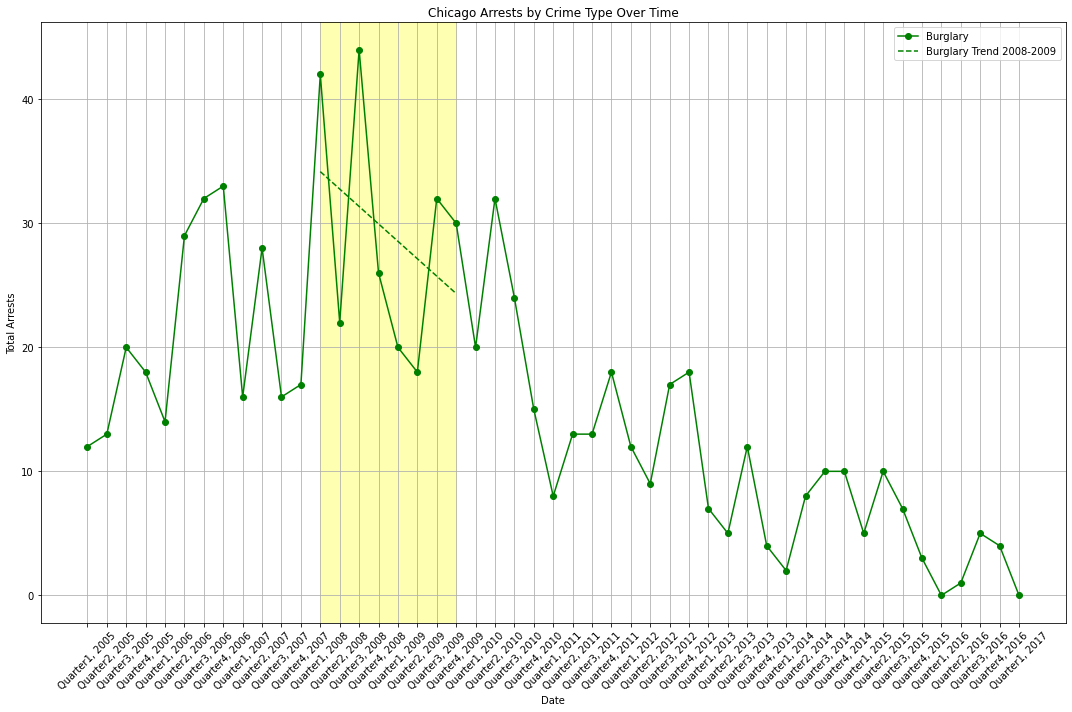

In [36]:
plt.figure(figsize=(15,10))

plt.plot(chicago_grouped['quarter'], chicago_grouped['Burglary'], label='Burglary', color = 'green', marker='o')


# highlighting inflation periods
twenty08 = chicago_grouped[chicago_grouped['quarter'] == 'Quarter1, 2008'].index[0]
twenty09 = chicago_grouped[chicago_grouped['quarter'] == 'Quarter4, 2009'].index[0]

#plotting highlights
plt.axvspan(twenty08, twenty09, color="yellow", alpha=0.3)


subset_08_09 = chicago_grouped.iloc[twenty08:twenty09+1] #slicing

x_08_09 = np.arange(len(subset_08_09))

y_burg_08_09 = subset_08_09['Burglary']


# linear regression for each subset
slope_burg_08, intercept_burg_08, _, _, _ = stats.linregress(x_08_09, y_burg_08_09)


# creating trend lines
trend_burg_08 = slope_burg_08 * x_08_09 + intercept_burg_08


#plotting trends
plt.plot(subset_08_09['quarter'], trend_burg_08, label='Burglary Trend 2008-2009',
            color='green', linestyle = "--")

# formatting
plt.title('Chicago Arrests by Crime Type Over Time')
plt.xlabel('Date')
plt.ylabel('Total Arrests')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()

plt.show()

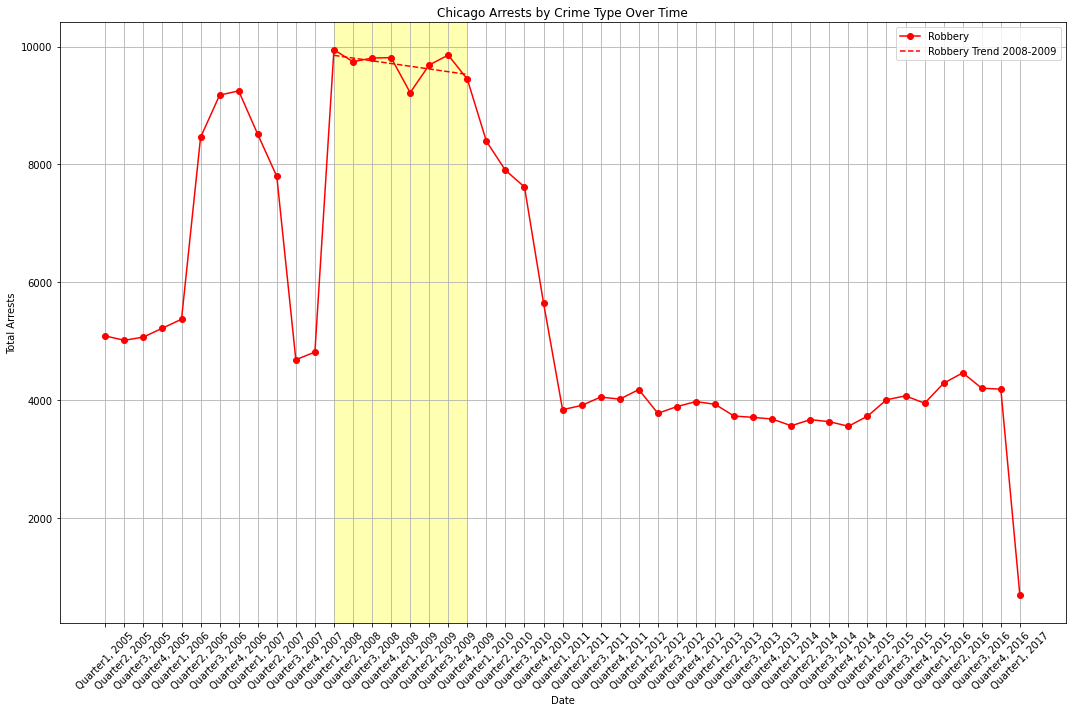

In [37]:
plt.figure(figsize=(15,10))

plt.plot(chicago_grouped['quarter'], chicago_grouped['Robbery'], label='Robbery', color = 'red', marker='o')

#plotting highlights
plt.axvspan(twenty08, twenty09, color="yellow", alpha=0.3)

subset_08_09 = chicago_grouped.iloc[twenty08:twenty09+1] #slicing

x_08_09 = np.arange(len(subset_08_09))

y_rob_08_09 = subset_08_09['Robbery']

slope_rob_08, intercept_rob_08, _, _, _ = stats.linregress(x_08_09, y_rob_08_09)

trend_rob_08 = slope_rob_08 * x_08_09 + intercept_rob_08

plt.plot(subset_08_09['quarter'], trend_rob_08, label='Robbery Trend 2008-2009',
            color='red', linestyle = "--")

# formatting
plt.title('Chicago Arrests by Crime Type Over Time')
plt.xlabel('Date')
plt.ylabel('Total Arrests')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()

plt.show()

### _LA Robbery/Burglary/Homicide_

Since this is the only dataset that covers the pandemic period only, we will investigate the period of mendated lockdown by the government. It started in mid March 2020, and ended at the end of January, 2021.

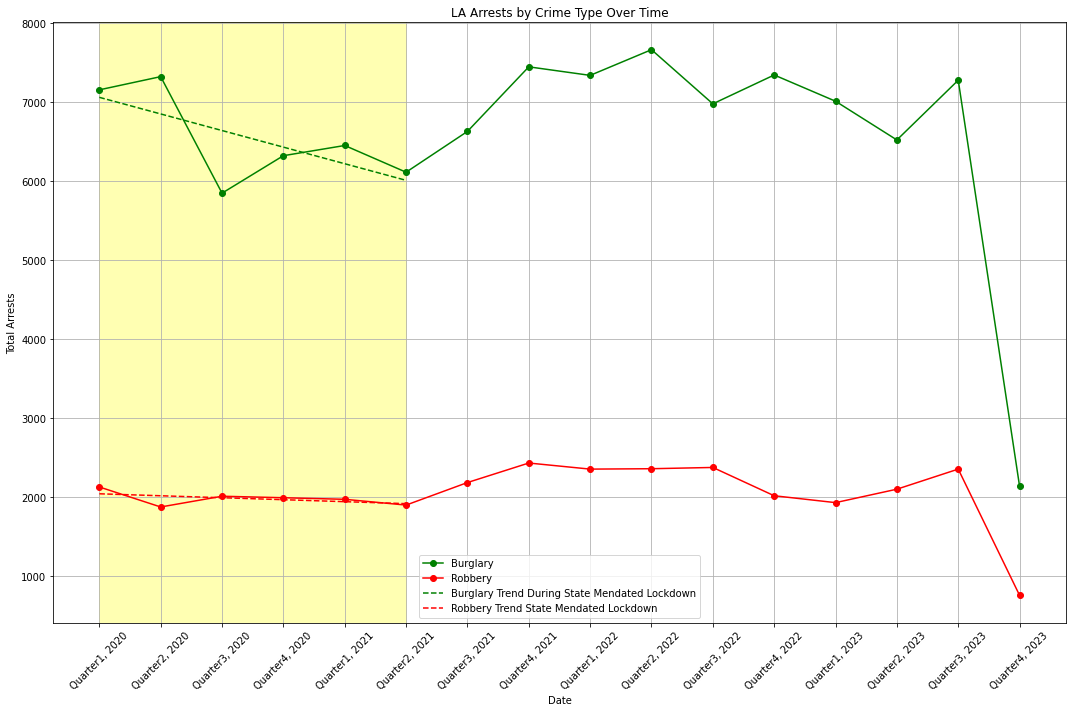

In [38]:
plt.figure(figsize=(15,10))

plt.plot(la_grouped['quarter'], la_grouped['Burglary'], label='Burglary', color = 'green', marker='o')
plt.plot(la_grouped['quarter'], la_grouped['Robbery'], label='Robbery', color = 'red', marker='o')

# highlighting inflation periods

twenty20 = la_grouped[la_grouped['quarter'] == 'Quarter1, 2020'].index[0]
twenty21 = la_grouped[la_grouped['quarter'] == 'Quarter2, 2021'].index[0]

#plotting highlights
plt.axvspan(twenty20, twenty21, color="yellow", alpha=0.3)


subset_20_21 = la_grouped.iloc[twenty20:twenty21+1] #slicing

x_20_21 = np.arange(len(subset_20_21))


y_burg_20_21 = subset_20_21['Burglary']
y_rob_20_21 = subset_20_21['Robbery']

# linear regression for each subset

slope_burg_20, intercept_burg_20, _, _, _ = stats.linregress(x_20_21, y_burg_20_21)
slope_rob_20, intercept_rob_20, _, _, _ = stats.linregress(x_20_21, y_rob_20_21)

# creating trend lines

trend_burg_20 = slope_burg_20 * x_20_21 + intercept_burg_20
trend_rob_20 = slope_rob_20 * x_20_21 + intercept_rob_20



plt.plot(subset_20_21['quarter'], trend_burg_20, label='Burglary Trend During State Mendated Lockdown',
            color='green', linestyle = "--")
plt.plot(subset_20_21['quarter'], trend_rob_20, label='Robbery Trend State Mendated Lockdown',
            color='red', linestyle = "--")


# formatting
plt.title('LA Arrests by Crime Type Over Time')
plt.xlabel('Date')
plt.ylabel('Total Arrests')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()

plt.show()

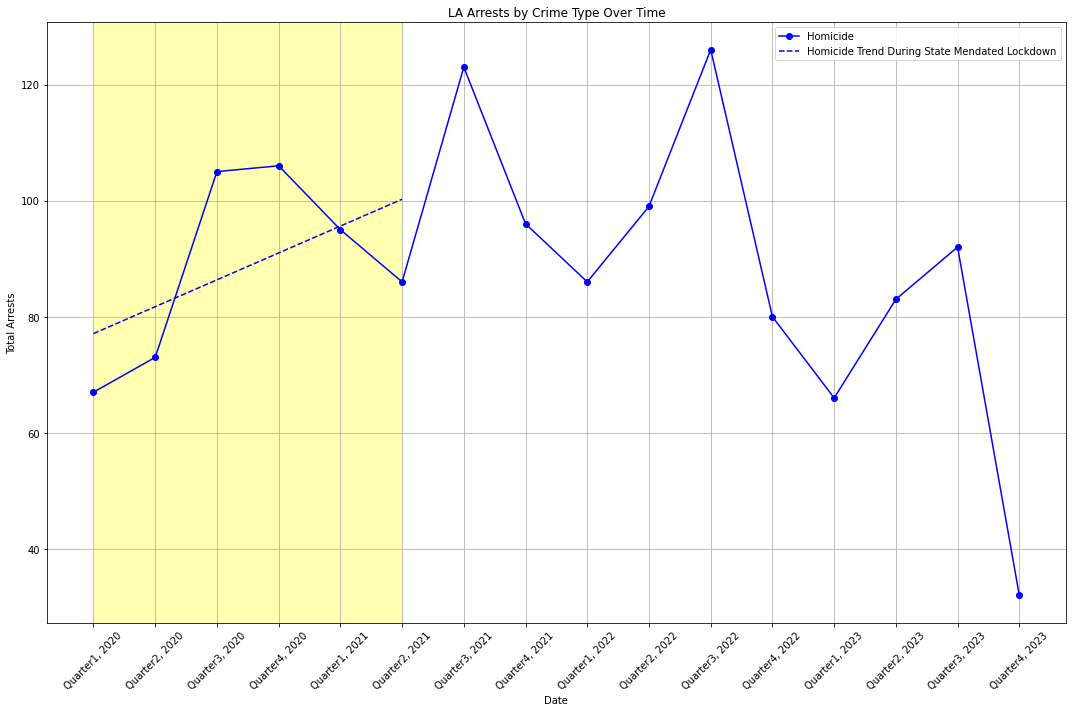

In [39]:
plt.figure(figsize=(15,10))

plt.plot(la_grouped['quarter'], la_grouped['Homicide'], label='Homicide', color = 'blue', marker='o')


# highlighting inflation periods

twenty20 = la_grouped[la_grouped['quarter'] == 'Quarter1, 2020'].index[0]
twenty21 = la_grouped[la_grouped['quarter'] == 'Quarter2, 2021'].index[0]

#plotting highlights
plt.axvspan(twenty20, twenty21, color="yellow", alpha=0.3)


subset_20_21 = la_grouped.iloc[twenty20:twenty21+1] #slicing

x_20_21 = np.arange(len(subset_20_21))


y_hom_20_21 = subset_20_21['Homicide']

# linear regression for each subset

slope_hom_20, intercept_hom_20, _, _, _ = stats.linregress(x_20_21, y_hom_20_21)

# creating trend lines

trend_hom_20 = slope_hom_20 * x_20_21 + intercept_hom_20



plt.plot(subset_20_21['quarter'], trend_hom_20, label='Homicide Trend During State Mendated Lockdown',
            color='blue', linestyle = "--")


# formatting
plt.title('LA Arrests by Crime Type Over Time')
plt.xlabel('Date')
plt.ylabel('Total Arrests')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()

plt.show()

### _LA Domestic Violence_

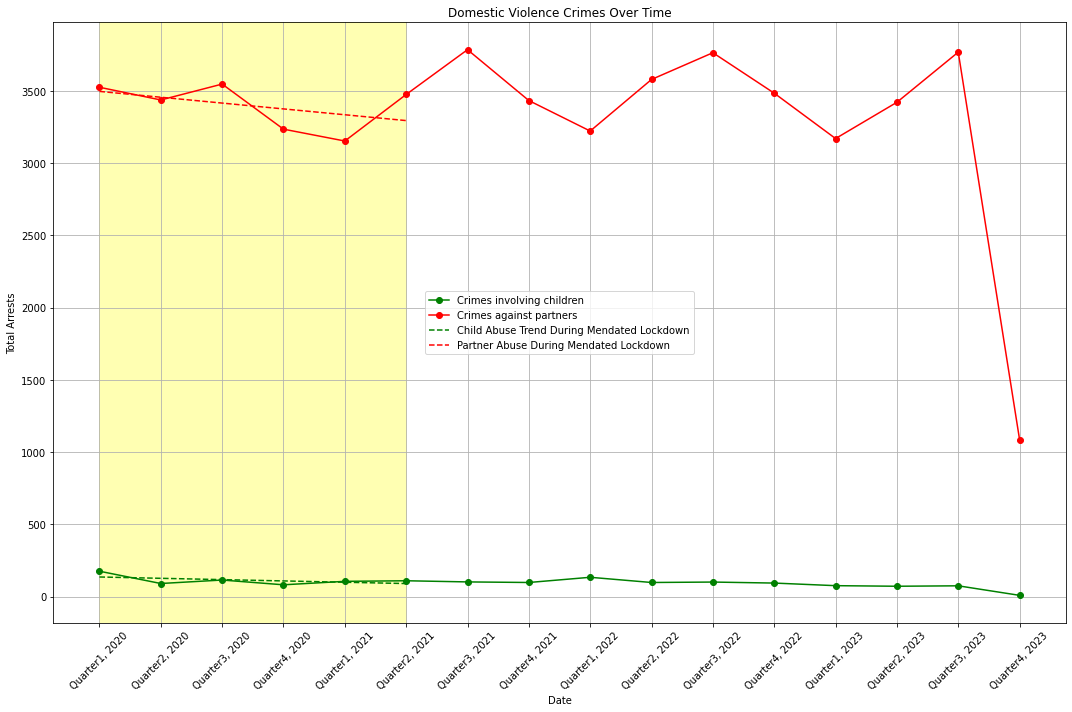

In [40]:
plt.figure(figsize=(15,10))

plt.plot(domestic_grouped['quarter'], domestic_grouped['Crimes involving children'], 
             label='Crimes involving children', color = 'green', marker='o')
plt.plot(domestic_grouped['quarter'], domestic_grouped['Crimes against partners'], 
             label='Crimes against partners', color = 'red', marker='o')

# highlighting inflation periods


twenty20 = domestic_grouped[domestic_grouped['quarter'] == 'Quarter1, 2020'].index[0]
twenty21 = domestic_grouped[domestic_grouped['quarter'] == 'Quarter2, 2021'].index[0]

#plotting highlights
plt.axvspan(twenty20, twenty21, color="yellow", alpha=0.3)

subset_20_21 = domestic_grouped.iloc[twenty20:twenty21+1] #slicing

x_20_21 = np.arange(len(subset_20_21))


y_chld_20_21 = subset_20_21['Crimes involving children']
y_partner_20_21 = subset_20_21['Crimes against partners']

# linear regression for each subset

slope_chld_20, intercept_chld_20, _, _, _ = stats.linregress(x_20_21, y_chld_20_21)
slope_partner_20, intercept_partner_20, _, _, _ = stats.linregress(x_20_21, y_partner_20_21)

# creating trend lines

trend_chld_20 = slope_chld_20 * x_20_21 + intercept_chld_20
trend_partner_20 = slope_partner_20 * x_20_21 + intercept_partner_20

#plotting trends

plt.plot(subset_20_21['quarter'], trend_chld_20, label='Child Abuse Trend During Mendated Lockdown',
            color='green', linestyle = "--")
plt.plot(subset_20_21['quarter'], trend_partner_20, label='Partner Abuse During Mendated Lockdown',
            color='red', linestyle = "--")


# formatting
plt.title('Domestic Violence Crimes Over Time')
plt.xlabel('Date')
plt.ylabel('Total Arrests')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()

plt.show()

## Part 5: Polynomial regression
Now I will build and evaluate using the train-test-split method from `scikit-learn`, 70% for training and 30% for testing. 

### _NYPD_

In [41]:
NYPD['ARREST_DATE'] = pd.to_datetime(NYPD['ARREST_DATE'])

crime_trend = NYPD.groupby(NYPD['ARREST_DATE'].dt.date).size().reset_index(name='total_crimes')

print(crime_trend.head())

  ARREST_DATE  total_crimes
0  2006-01-01           551
1  2006-01-02           618
2  2006-01-03           899
3  2006-01-04          1229
4  2006-01-05          1383


In [42]:
# convert arrest_date to numeric
crime_trend['date_numeric'] = pd.to_datetime(crime_trend['ARREST_DATE']).map(pd.Timestamp.toordinal)

crime_trend.head()

,ARREST_DATE,total_crimes,date_numeric
0,2006-01-01,551,732312
1,2006-01-02,618,732313
2,2006-01-03,899,732314
3,2006-01-04,1229,732315
4,2006-01-05,1383,732316


In [43]:
# define independent column
X = crime_trend[['date_numeric']]

#define dependent column
y = crime_trend['date_numeric']


In [44]:
#create polynomial feature
poly = PolynomialFeatures(degree=5)

# transform independent variable
X_poly = poly.fit_transform(X)

In [45]:
# train_test_split method
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

print(X_train.shape, X_test.shape)

(4601, 6) (1973, 6)


In [46]:
model = LinearRegression()

#train the model
model.fit(X_train, y_train)

print("Coefficients:", model.coef_)
    
print("Intercept:", model.intercept_)

Coefficients: [ 0.00000000e+00  1.13225141e-27  6.96416268e-30  5.12270258e-24
  2.51221520e-18 -2.04907055e-24]
Intercept: 441362.58330384106


In [47]:
# predict the toal crimes on the test

y_pred = model.predict(X_test)

#evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
display(HTML(f"R<sup>2</sup> Score: {r2}"))

Mean Squared Error: 0.00039963219251845167


<span style="color:red; font-size:24px;">Note that there is going to be here a graph showing the trend over the scatter plot. Currently unable to produce it</span>

### _Chicago_

In [ ]:
chicago['Date'] = pd.to_datetime(chicago['Date'])

crime_trend = chicago.groupby(chicago['Date'].dt.date).size().reset_index(name='total_crimes')

print(crime_trend.head())

In [ ]:
# convert arrest_date to numeric
crime_trend['date_numeric'] = pd.to_datetime(crime_trend1['Date']).map(pd.Timestamp.toordinal)

crime_trend1.head()

In [ ]:
# define independent column
X = crime_trend1[['date_numeric']]

#define dependent column
y = crime_trend1['date_numeric']


In [ ]:
#create polynomial feature
poly = PolynomialFeatures(degree=5)

# transform independent variable
X_poly = poly.fit_transform(X)

In [ ]:
# train_test_split method
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

print(X_train.shape, X_test.shape)

In [ ]:
model = LinearRegression()

#train the model
model.fit(X_train, y_train)

print("Coefficients:", model.coef_)
    
print("Intercept:", model.intercept_)

In [ ]:
# predict the toal crimes on the test

y_pred = model.predict(X_test)

#evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
display(HTML(f"R<sup>2</sup> Score: {r2}"))

### _LA_

In [ ]:
LA['DATE_OCC'] = pd.to_datetime(LA['DATE_OCC'])

crime_trend = LA.groupby(LA['DATE_OCC'].dt.date).size().reset_index(name='total_crimes')

print(crime_trend.head())

In [ ]:
# convert arrest_date to numeric
crime_trend['date_numeric'] = pd.to_datetime(crime_trend['DATE_OCC']).map(pd.Timestamp.toordinal)

crime_trend.head()

In [ ]:
# define independent column
X = crime_trend[['date_numeric']]

#define dependent column
y = crime_trend['date_numeric']


In [ ]:
#create polynomial feature
poly = PolynomialFeatures(degree=5)

# transform independent variable
X_poly = poly.fit_transform(X)

In [ ]:
# train_test_split method
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

print(X_train.shape, X_test.shape)

In [ ]:
model = LinearRegression()

#train the model
model.fit(X_train, y_train)

print("Coefficients:", model.coef_)
    
print("Intercept:", model.intercept_)

In [ ]:
# predict the toal crimes on the test

y_pred = model.predict(X_test)

#evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
display(HTML(f"R<sup>2</sup> Score: {r2}"))

## Part 6: Random Forest 

### _NYPD_

In [ ]:
NYPD['ARREST_DATE'] = pd.to_datetime(NYPD['ARREST_DATE'])
crime_counts = NYPD.groupby('ARREST_DATE').size().reset_index(name = "total_crimes")

In [ ]:
#extract date features
crime_counts['Year'] = crime_counts['ARREST_DATE'].dt.year
crime_counts['Month'] = crime_counts['ARREST_DATE'].dt.month
crime_counts['Day'] = crime_counts['ARREST_DATE'].dt.day

In [ ]:
## dependent varianle 
features = crime_counts[['Year', 'Month', 'Day']]

#independent variable
target = crime_counts['total_crimes']

In [ ]:
# train_test_split method
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

print(X_train.shape, X_test.shape)

In [ ]:
#random forest method

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

In [ ]:
#predict
predictions = model.predict(X_test)

In [ ]:
#evaluate
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
display(HTML(f"R<sup>2</sup> Score: {r2}"))

### _Chicago_

In [ ]:
chicago['Date'] = pd.to_datetime(chicago['Date'])
crime_counts = chicago.groupby('Date').size().reset_index(name = "total_crimes")

In [ ]:
#extract date features
crime_counts['Year'] = crime_counts['Date'].dt.year
crime_counts['Month'] = crime_counts['Date'].dt.month
crime_counts['Day'] = crime_counts['Date'].dt.day

In [ ]:
## dependent varianle 
features = crime_counts[['Year', 'Month', 'Day']]

#independent variable
target = crime_counts['total_crimes']

In [ ]:
# train_test_split method
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

print(X_train.shape, X_test.shape)

In [ ]:
#random forest method

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

In [ ]:
#predict
predictions = model.predict(X_test)

In [ ]:
#evaluate
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
display(HTML(f"R<sup>2</sup> Score: {r2}"))

### _LA_

In [ ]:
LA['DATE_OCC'] = pd.to_datetime(LA['DATE_OCC'])
crime_counts = LA.groupby('DATE_OCC').size().reset_index(name = "total_crimes")

In [ ]:
#extract date features
crime_counts['Year'] = crime_counts['DATE_OCC'].dt.year
crime_counts['Month'] = crime_counts['DATE_OCC'].dt.month
crime_counts['Day'] = crime_counts['DATE_OCC'].dt.day

In [ ]:
## dependent varianle 
features = crime_counts[['Year', 'Month', 'Day']]

#independent variable
target = crime_counts['total_crimes']

In [ ]:
# train_test_split method
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

print(X_train.shape, X_test.shape)

In [ ]:
#random forest method

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

In [ ]:
#predict
predictions = model.predict(X_test)

In [ ]:
#evaluate
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
display(HTML(f"R<sup>2</sup> Score: {r2}"))

## Part 7: Conclusions

<span style="color:red; font-size:18px;">Note that this excludes the literature related analysis and these conclusions regard the machine learning methods only.</span>

As it seems, for all datasets, the plynomial regression was almost accurate when it comes to predicting the crime rate (all are more than 99% R2 score and withe very little MSE). On the other hand, the random forrest method did not predict the crime rate at all, as the MSE and R2 show low perfoemance. 